# Tracking Changes to RietveldPhases

This notebook tracks changes as they're made to the RietveldPhases module/class.

In [1]:
from src.RietveldPhases import RietveldPhases as Rp

In [2]:
Rp.set_profile(r"./data/profiles/Jade-Al2O3-Sim.xye")

In [3]:
tmp = Rp("./data/cifs/1000032.cif")
str(tmp.U)

"[('U',  0.,  0.,  0.1)]"

In [4]:
Rp.set_bkgd_order(2)
assert Rp.bkgd.shape[0] == 2

In [5]:
print Rp.two_theta

[  5.     5.02   5.04 ...,  89.96  89.98  90.  ]


In [6]:
print Rp.I

[ 1.  1.  1. ...,  2.  2.  2.]


In [7]:
print Rp.background_polynomial()
Rp.bkgd['values'][0] = 1
print Rp.background_polynomial()

[ 0.  0.  0. ...,  0.  0.  0.]
[ 1.  1.  1. ...,  1.  1.  1.]


In [8]:
tmp.V

array([('V', -0., -0.1,  0.)],
      dtype=[('labels', 'S12'), ('values', '<f8'), ('l_limits', '<f8'), ('u_limits', '<f8')])

In [9]:
import numpy as np
tmp2 = np.stack((tmp.U,tmp.V))

In [10]:
tmp2['labels'][1] = 'S'
tmp2

array([[('U',  0.,  0. ,  0.1)],
       [('S', -0., -0.1,  0. )]],
      dtype=[('labels', 'S12'), ('values', '<f8'), ('l_limits', '<f8'), ('u_limits', '<f8')])

In [11]:
tmp.V = tmp2[1]
tmp.V

array([('S', -0., -0.1,  0.)],
      dtype=[('labels', 'S12'), ('values', '<f8'), ('l_limits', '<f8'), ('u_limits', '<f8')])

In [12]:
tmp.assemble_params()
tmp.phase_x['labels'][1] = 'X'
tmp.V

array([('X', -0., -0.1,  0.)],
      dtype=[('labels', 'S12'), ('values', '<f8'), ('l_limits', '<f8'), ('u_limits', '<f8')])

In [13]:
str(tmp.eta)

"[('eta_0',  0.5,  0.   ,  1.   ) ('eta_1',  0. , -0.001,  0.001)]"

In [14]:
Rp.bkgd
Rp.background_polynomial()

array([ 1.,  1.,  1., ...,  1.,  1.,  1.])

In [15]:
tmp.set_lattice_parameters()

array([('uc_a',    4.7605,    4.712895,    4.808105),
       ('uc_b',    4.7605,    4.712895,    4.808105),
       ('uc_c',   12.9956,   12.865644,   13.125556),
       ('uc_alpha',   90.    ,   89.1     ,   90.9     ),
       ('uc_beta',   90.    ,   89.1     ,   90.9     ),
       ('uc_gamma',  120.    ,  118.8     ,  121.2     )],
      dtype=[('labels', 'S12'), ('values', '<f8'), ('l_limits', '<f8'), ('u_limits', '<f8')])

In [16]:
tmp.lattice_parameters[0]

('uc_a',  4.7605,  4.712895,  4.808105)

In [17]:
tmp.eta_polynomial()

array([ 0.5,  0.5,  0.5, ...,  0.5,  0.5,  0.5])

In [18]:
float(tmp.U['values'])

0.0

In [19]:
np.max(tmp.phase_profile())

0.72459556758528465

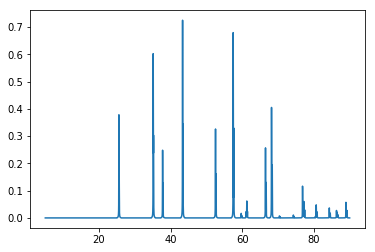

In [20]:
import matplotlib.pyplot as plt
plt.plot(Rp.two_theta,tmp.phase_profile())
plt.show()